In [1]:
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))

In [2]:
x_chrom_predict_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/differentiation_prediction/differentiation_marker_LMM_w_donor_results.transcriptome_wide_scan_pseudotime.tsv"
x_chrom_predict = read.csv(x_chrom_predict_filename, sep = "\t")
head(x_chrom_predict)

timepoint1,gene1,timepoint2,gene2,coefficient,pval
day2,RHOBTB3,day3,pseudotime,0.03021659,1.627948e-12
day2,pseudotime,day3,pseudotime,0.45514869,2.521506e-11
day2,NFKBIA,day3,pseudotime,0.03363206,7.330706e-11
day2,FABP7,day3,pseudotime,-0.07669604,9.433033e-11
day2,MCF2L2,day3,pseudotime,0.04256104,1.681768e-09
day2,NANOG,day3,pseudotime,-0.03843010,2.797062e-09


In [3]:
x_chrom_predict_day0 = x_chrom_predict[x_chrom_predict$timepoint1 == "day0",]
x_chrom_predict_day0$hgnc_symbol = x_chrom_predict_day0$gene1
head(x_chrom_predict_day0)

,timepoint1,gene1,timepoint2,gene2,coefficient,pval,hgnc_symbol
57,day0,GRPR,day3,pseudotime,-0.06123211,8.675658e-07,GRPR
62,day0,ZDHHC9,day3,pseudotime,-0.04286353,1.130310e-06,ZDHHC9
135,day0,GPM6B,day3,pseudotime,-0.03571242,1.170422e-05,GPM6B
139,day0,TMEM47,day3,pseudotime,-0.04089212,1.252561e-05,TMEM47
159,day0,MOSPD2,day3,pseudotime,-0.05051760,1.647873e-05,MOSPD2
176,day0,FAM92A1,day3,pseudotime,-0.03788094,2.079964e-05,FAM92A1


In [4]:
## add gene info
gene_info_filename = "/nfs/leia/research/stegle/dseaton/genomes/hg19/annotation/Homo_sapiens.GRCh37.75.genes.bed"
gene_info = read.table(gene_info_filename)
colnames(gene_info) = c("chromosome_name","start_position","end_position","ensembl_gene_id","gene_biotype","strand")
head(gene_info)

chromosome_name,start_position,end_position,ensembl_gene_id,gene_biotype,strand
1,11868,14412,ENSG00000223972,pseudogene,+
1,14362,29806,ENSG00000227232,pseudogene,-
1,29553,31109,ENSG00000243485,lincRNA,+
1,34553,36081,ENSG00000237613,lincRNA,-
1,52472,54936,ENSG00000268020,pseudogene,+
1,62947,63887,ENSG00000240361,pseudogene,+


In [5]:
gene_annos_filename = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
gene_annos = read.csv(gene_annos_filename, sep = "\t")
head(gene_annos)

feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
ENSG00000000003_TSPAN6,X,99883667,99894988,TSPAN6,ENSG00000000003_TSPAN6,ENSG00000000003
ENSG00000000419_DPM1,20,49551404,49575092,DPM1,ENSG00000000419_DPM1,ENSG00000000419
ENSG00000000457_SCYL3,1,169818772,169863408,SCYL3,ENSG00000000457_SCYL3,ENSG00000000457
ENSG00000000460_C1orf112,1,169631245,169823221,C1orf112,ENSG00000000460_C1orf112,ENSG00000000460
ENSG00000001036_FUCA2,6,143815948,143832827,FUCA2,ENSG00000001036_FUCA2,ENSG00000001036
ENSG00000001084_GCLC,6,53362139,53481768,GCLC,ENSG00000001084_GCLC,ENSG00000001084


In [6]:
df.gene = inner_join(gene_info, gene_annos, by = "ensembl_gene_id")
head(df.gene)

chromosome_name,start_position,end_position,ensembl_gene_id,gene_biotype,strand,feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id
1,14362,29806,ENSG00000227232,pseudogene,-,ENSG00000227232_WASH7P,1,14363,29806,WASH7P,ENSG00000227232_WASH7P
1,52472,54936,ENSG00000268020,pseudogene,+,ENSG00000268020_OR4G4P,1,52473,54936,OR4G4P,ENSG00000268020_OR4G4P
1,564441,564813,ENSG00000225972,pseudogene,+,ENSG00000225972_MTND1P23,1,564442,564813,MTND1P23,ENSG00000225972_MTND1P23
1,565019,566063,ENSG00000225630,pseudogene,+,ENSG00000225630_MTND2P28,1,565020,566063,MTND2P28,ENSG00000225630_MTND2P28
1,569075,569756,ENSG00000248527,pseudogene,+,ENSG00000248527_MTATP6P1,1,569076,569756,MTATP6P1,ENSG00000248527_MTATP6P1
1,860259,879955,ENSG00000187634,protein_coding,+,ENSG00000187634_SAMD11,1,860260,879955,SAMD11,ENSG00000187634_SAMD11


In [7]:
nrow(x_chrom_predict_day0)
df = left_join(x_chrom_predict_day0, df.gene, by = "hgnc_symbol")
nrow(df)

[1] 11249

[1] 11249

In [8]:
df = df[!(is.na(df$start_position)),]
nrow(df)

[1] 11149

In [9]:
add_TSS <- function(res){                                       
    res[res$strand == "+","TSS"] = res[res$strand == "+","start_position"]
    res[res$strand == "-","TSS"] = res[res$strand == "-","end_position"]
    res
}

In [10]:
df = add_TSS(df)

In [11]:
df$corr_pval = p.adjust(df$pval, method = "BH")

In [12]:
## features to highlight in the Manhattan plot
# significant, NOT on X chromosome
featuresOfInterestNotX = df[df$corr_pval < 0.1 & df$chromosome_name != "X", "feature_id"]
# significant, ON X chromosome
featuresOfInterestX = df[df$corr_pval < 0.1 & df$chromosome_name == "X", "feature_id"]

In [20]:
example_notX = gene = "ENSG00000205542_TMSB4X"
example_X = "ENSG00000156453_PCDH1"

In [13]:
## P value corresponding to largest significant corrected P 
df_sign = df[df$corr_pval < 0.1,]
-log10(tail(df_sign[order(df_sign$corr_pval),],1)[,"pval"])

[1] 3.507208

In [14]:
df = df[df$chromosome_name %in% c(1:22,"X"),]
# re-order chromosome names
df$CHR = as.factor(df$chromosome)
levels(df$CHR)
df$CHR =factor(df$CHR, levels(df$CHR)[c(1,12,16:22,2:11,13:15,23)])
levels(df$CHR)

[1] "1"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "2"  "20" "21" "22"
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "X"

In [41]:
# Prepare the dataset
don <- df %>%   
  # Compute chromosome size
  group_by(CHR) %>% 
  summarise(chr_len = max(TSS)) %>% 
  # Calculate cumulative position of each chromosome
  dplyr::mutate(tot = cumsum(chr_len) - chr_len) %>%
  select(-chr_len) %>%  
  # Add this info to the initial dataset
  left_join(df, ., by = c("CHR" = "CHR")) %>%  
  # Add a cumulative position of each SNP
  dplyr::arrange(CHR, TSS) %>%
  dplyr::mutate( BPcum = TSS + tot) %>%
  # Add highlight and annotation information
  dplyr::mutate( is_highlight1 = ifelse(feature_id %in% featuresOfInterestNotX, "yes", "no")) %>%
  dplyr::mutate( is_highlight2 = ifelse(feature_id %in% featuresOfInterestX, "yes", "no")) %>%
  # specific examples
  dplyr::mutate( is_highlight3 = ifelse(feature_id == example_notX, "yes", "no")) %>%
  dplyr::mutate( is_highlight4 = ifelse(feature_id == example_X, "yes", "no")) %>%
  # Filter SNP to make the plot lighter
  dplyr::filter(-log10(pval) > 0)
  
# Prepare X axis
axisdf <- don %>% group_by(CHR) %>% summarize(center =( max(BPcum) + min(BPcum) ) / 2 )

# Make the plot
p <- ggplot(don, aes(x = BPcum, y = -log10(pval)*sign(coefficient), text = "")) +
    
    # Show all points
    geom_point( aes(color = as.factor(CHR)), alpha = 0.3, size = 0.8) +
    scale_color_manual(values = rep(c("grey75", "dimgrey"), 22 )) +
    
    # custom X axis:
    scale_x_continuous( label = axisdf$CHR, breaks = axisdf$center ) +
    scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
    ylim(-9,9)+ 
    xlab("gene location (TSS)") +
    ylab("-log10(P) X \neffect direction") +

    # Add highlighted points
    geom_point(data = subset(don, is_highlight1 == "yes"), col = "dodgerblue", size = 1.2, alpha = 0.3) +
    geom_point(data = subset(don, is_highlight2 == "yes"), col = "firebrick", size = 1.2, alpha = 0.3) +
    geom_point(data = subset(don, is_highlight3 == "yes"), col = "red", size = 1.8) +
    geom_point(data = subset(don, is_highlight4 == "yes"), col = "#344d90", size = 1.8) +
 
#     geom_point(data = subset(don, is_highlight3 == "yes"), col = "green", size = 3) +
    
    # Add significance threshold
    geom_hline(yintercept = 3.5, alpha = 0.3, col = "dodgerblue") +
    geom_hline(yintercept = -3.5, alpha = 0.3, col = "dodgerblue") +
    
    # Custom the theme:
    theme_bw() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_blank(),
      text = element_text(size = 16)
    ) 

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


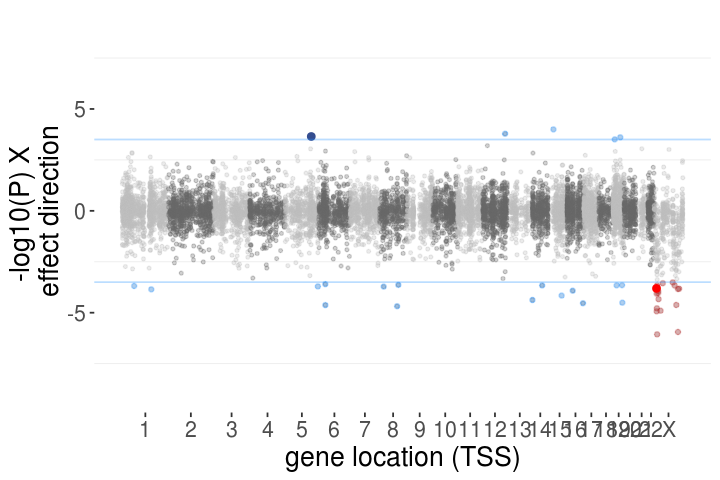

In [43]:
options(repr.plot.width = 6, repr.plot.height = 4)
p

In [18]:
don[-log10(don$pval)*sign(don$coefficient) > 3.5,]

,timepoint1,gene1,timepoint2,gene2,coefficient,pval,hgnc_symbol,chromosome_name,start_position,end_position,⋯,start,end,combined_feature_id,TSS,corr_pval,CHR,tot,BPcum,is_highlight1,is_highlight2
3248,day0,PCDH1,day3,pseudotime,0.03591908,0.0002243166,PCDH1,5,141232937,141258811,⋯,141232938,141258811,ENSG00000156453_PCDH1,141258811,0.07811264,5,880423399,1021682210,yes,no
6865,day0,RNF34,day3,pseudotime,0.05993847,0.0001648310,RNF34,12,121837843,121868389,⋯,121837844,121868389,ENSG00000170633_RNF34,121837843,0.07811264,12,1947674638,2069512481,yes,no
7509,day0,HERC2,day3,pseudotime,0.04459036,0.0001009414,HERC2,15,28356185,28567298,⋯,28356186,28567298,ENSG00000128731_HERC2,28567298,0.07033724,15,2302418385,2330985683,yes,no
9371,day0,RAB11B,day3,pseudotime,0.05501603,0.0003110227,RAB11B,19,8454864,8469318,⋯,8454865,8469318,ENSG00000185236_RAB11B,8454864,0.09125241,19,2654049271,2662504135,yes,no
9699,day0,ZNF573,day3,pseudotime,0.04328905,0.0002454304,ZNF573,19,38226733,38307940,⋯,38226734,38307940,ENSG00000189144_ZNF573,38307940,0.08017668,19,2654049271,2692357211,yes,no


In [19]:
don[-log10(don$pval)*sign(don$coefficient) < -3.5 & don$CHR == "X",]

,timepoint1,gene1,timepoint2,gene2,coefficient,pval,hgnc_symbol,chromosome_name,start_position,end_position,⋯,start,end,combined_feature_id,TSS,corr_pval,CHR,tot,BPcum,is_highlight1,is_highlight2
10774,day0,TMSB4X,day3,pseudotime,-0.02479139,1.556929e-04,TMSB4X,X,12993226,12995346,⋯,12993227,12995346,ENSG00000205542_TMSB4X,12993226,0.078112639,X,2875317331,2888310557,no,yes
10776,day0,RAB9A,day3,pseudotime,-0.02572455,8.555880e-05,RAB9A,X,13707243,13728625,⋯,13707244,13728625,ENSG00000123595_RAB9A,13707243,0.068118221,X,2875317331,2889024574,no,yes
10779,day0,GPM6B,day3,pseudotime,-0.03571242,1.170422e-05,GPM6B,X,13789149,13956757,⋯,13789150,13956757,ENSG00000046653_GPM6B,13956757,0.033370211,X,2875317331,2889274088,no,yes
10782,day0,MOSPD2,day3,pseudotime,-0.05051760,1.647873e-05,MOSPD2,X,14891562,14940449,⋯,14891563,14940449,ENSG00000130150_MOSPD2,14891562,0.033370211,X,2875317331,2890208893,no,yes
10788,day0,AP1S2,day3,pseudotime,-0.02753188,2.152895e-04,AP1S2,X,15843928,15873054,⋯,15843929,15873054,ENSG00000182287_AP1S2,15873054,0.078112639,X,2875317331,2891190385,no,yes
10789,day0,GRPR,day3,pseudotime,-0.06123211,8.675658e-07,GRPR,X,16141678,16171144,⋯,16141679,16171144,ENSG00000126010_GRPR,16141678,0.006300913,X,2875317331,2891459009,no,yes
10804,day0,MBTPS2,day3,pseudotime,-0.06048968,9.164708e-05,MBTPS2,X,21857753,21903542,⋯,21857754,21903542,ENSG00000012174_MBTPS2,21857753,0.068118221,X,2875317331,2897175084,no,yes
10805,day0,SMS,day3,pseudotime,-0.03298652,1.151230e-04,SMS,X,21958690,22025798,⋯,21958691,22025798,ENSG00000102172_SMS,21958690,0.074248433,X,2875317331,2897276021,no,yes
10811,day0,APOO,day3,pseudotime,-0.02835553,4.623369e-05,APOO,X,23851469,23926057,⋯,23851470,23926057,ENSG00000184831_APOO,23926057,0.042954955,X,2875317331,2899243388,no,yes
10821,day0,TMEM47,day3,pseudotime,-0.04089212,1.252561e-05,TMEM47,X,34645180,34675405,⋯,34645181,34675405,ENSG00000147027_TMEM47,34675405,0.033370211,X,2875317331,2909992736,no,yes


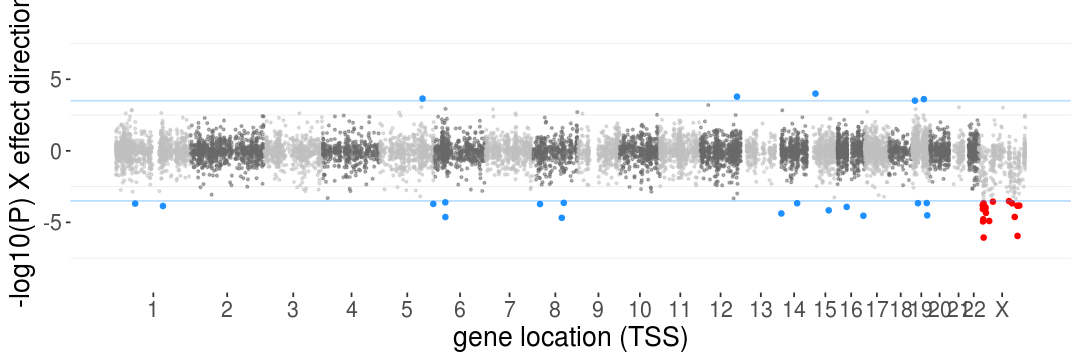

In [38]:
options(repr.plot.width = 9, repr.plot.height = 3)
p